In [1]:
import nest
import pylab

# 1つの神経細胞を作る

In [2]:
neuron = nest.Create("iaf_psc_alpha")

neuronはIDを持つ。

In [3]:
print(neuron)

(1,)


# 神経細胞の状態を読み出す
GetStatusにIDを持ったneuronと読み出すリストを渡す。

In [4]:
nest.GetStatus(neuron, "I_e")

(0.0,)

In [5]:
nest.GetStatus(neuron, ["V_reset", "V_th"])

((-70.0, -55.0),)

# 神経細胞の状態を設定する
SetStatusにIDを持ったneuronと設定する引数と値の辞書を渡す。

I_eは外部信号の電流. 慣習. μA

In [6]:
nest.SetStatus(neuron, {"I_e": 376.0})

In [7]:
nest.GetStatus(neuron, "I_e")

(376.0,)

# 神経細胞の状態変化を記録する
withtimeで時間出力、record_fromで記録したい変数を指定する。

In [8]:
multimeter = nest.Create("multimeter")

In [9]:
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

# 神経細胞の発火時刻を記録する
発火した神経細胞のIDを出力する。

In [10]:
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime":True})

# 記録装置と神経細胞をつなぐ
あるニューロンをどのmultimeter/spikedetectorを繋ぐ

In [11]:
nest.Connect(multimeter, neuron)

In [12]:
nest.Connect(neuron, spikedetector)

# シミュレーションを実行する
指定するのは時間のみ

In [13]:
nest.Simulate(1000.0)

<function matplotlib.pyplot.show>

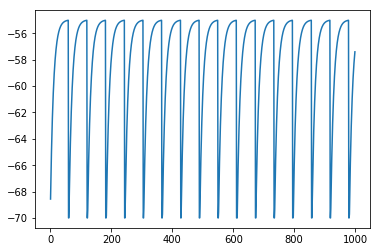

In [14]:
dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
ts = dm["events"]["times"]
pylab.figure(1)
pylab.plot(ts, Vms)
pylab.show

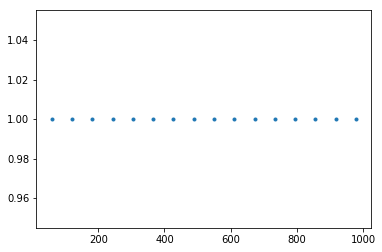

In [15]:
dSD = nest.GetStatus(spikedetector, keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

# lzhikevichモデル

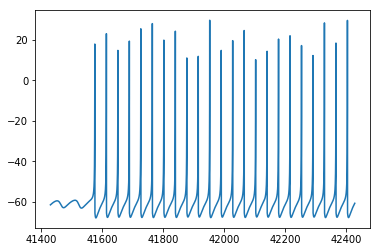

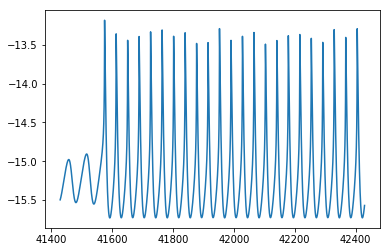

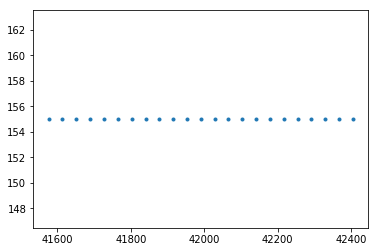

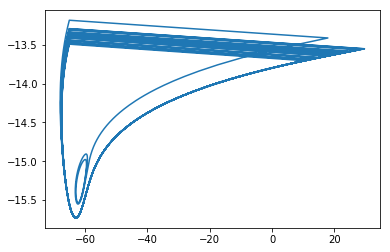

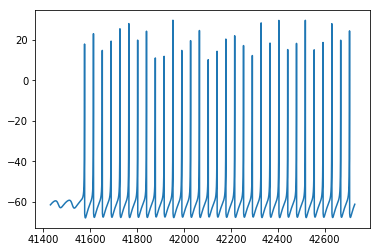

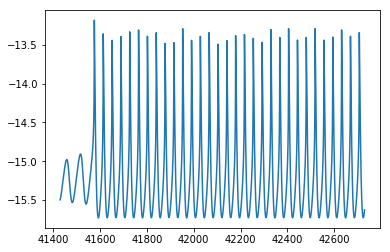

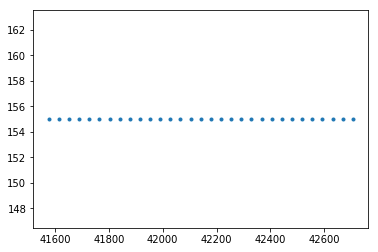

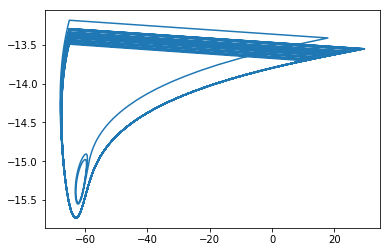

In [76]:
import nest
import pylab


# I_e, a, b, c, d = 5., 0.02, 0.2, -65., 8. #RS
# I_e, a, b, c, d = 5., 0.02, 0.2, -55., 4. #IB
# I_e, a, b, c, d = 5., 0.02, 0.2, -50., 2. #CH
# I_e, a, b, c, d = 5., 0.1, 0.2, -65., 2. #FS


# I_e, a, b, c, d = 5., 0.02, 0.2, -52.5, 3. #IBとCHの中間？

# I_e, a, b, c, d = 5., 0.02, 0.2, -50., 16. #Uとd

I_e, a, b, c, d = 0.85, 0.1, 0.25, -65., 0.05 #閾値下の振動




neuron = nest.Create ("izhikevich")
nest.SetStatus(neuron, {"I_e": I_e, "a": a, "b":b, "c":c, "d":d, "V_m": -61.5, "U_m":-15.5})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime": True, "record_from":["V_m", "U_m"], "interval":0.1})
spikedetector = nest.Create("spike_detector", params={"withgid":True, "withtime":True})
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

nest.Simulate(1000.0)

dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
ts = dm["events"]["times"]
pylab.figure(1)
pylab.plot(ts, Vms)

dm = nest.GetStatus(multimeter)[0]
Ums =dm["events"]["U_m"]
ts = dm["events"]["times"]
pylab.figure(2)
pylab.plot(ts, Ums)

dSD = nest.GetStatus(spikedetector, keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(3)
pylab.plot(ts, evs, ".")
pylab.show()

dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
Ums =dm["events"]["U_m"]
pylab.figure(4)
pylab.plot(Vms, Ums)

nest.Simulate(300.0)

dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
ts = dm["events"]["times"]
pylab.figure(5)
pylab.plot(ts, Vms)

dm = nest.GetStatus(multimeter)[0]
Ums =dm["events"]["U_m"]
ts = dm["events"]["times"]
pylab.figure(6)
pylab.plot(ts, Ums)

dSD = nest.GetStatus(spikedetector, keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(7)
pylab.plot(ts, evs, ".")
pylab.show()

dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
Ums =dm["events"]["U_m"]
pylab.figure(8)
pylab.plot(Vms, Ums)

# Hodgkin-Huxleyモデル

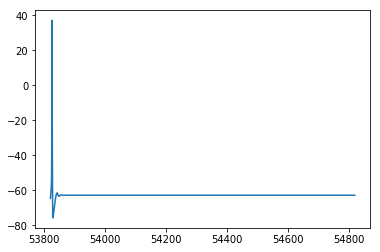

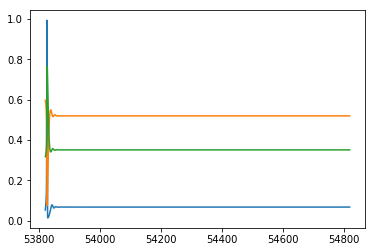

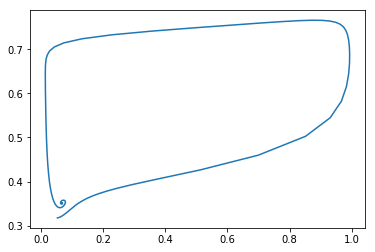

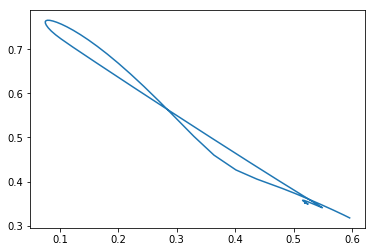

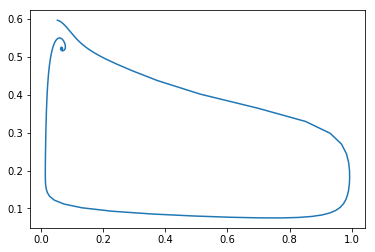

In [91]:
import nest
import pylab

neuron = nest.Create ("hh_psc_alpha")
nest.SetStatus(neuron, {"I_e": 300.})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "interval":0.1, "record_from":["V_m", "Act_m", "Inact_h", "Act_n"]})

nest.Connect(multimeter, neuron)

nest.Simulate(1000.0)

dm = nest.GetStatus(multimeter)[0]
Vms =dm["events"]["V_m"]
m = dm["events"]["Act_m"]
h = dm["events"]["Inact_h"]
n = dm["events"]["Act_n"]
ts = dm["events"]["times"]
pylab.figure(1)
pylab.plot(ts, Vms)

pylab.figure(2)
pylab.plot(ts, m)
pylab.plot(ts, h)
pylab.plot(ts, n)
pylab.show()

pylab.figure(3)
pylab.plot(m, n)

pylab.figure(4)
pylab.plot(h, n)

pylab.figure(5)
pylab.plot(m, h)

# 複数の神経細胞シミュレーション

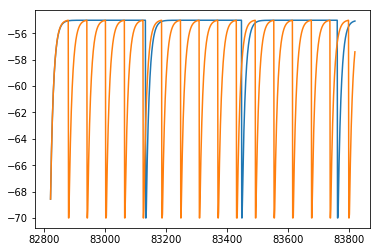

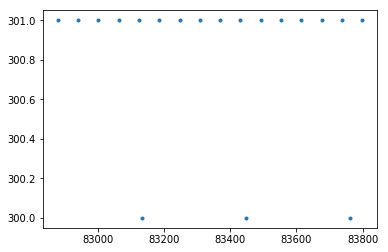

In [121]:
import pylab
import nest

neuron1 = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")

nest.SetStatus(neuron1, {"I_e": 375.00000000001})  # 発火する！
# nest.SetStatus(neuron1, {"I_e": 375.0})  # 発火しない
nest.SetStatus(neuron2, {"I_e": 376.0})

multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True,
"withtime": True})

nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)

nest.Connect(neuron1, spikedetector)
nest.Connect(neuron2, spikedetector)

nest.Simulate(1000.0)

pylab.figure(1)
dm = nest.GetStatus(multimeter)[0]
Vms1 = dm["events"]["V_m"][::2]
ts1 = dm["events"]["times"][::2]
pylab.plot(ts1, Vms1)

Vms2 = dm["events"]["V_m"][1::2]
ts2 = dm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)


pylab.figure(2)
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.plot(ts, evs, ".")
pylab.show()

# 二つの神経細胞をつなげる

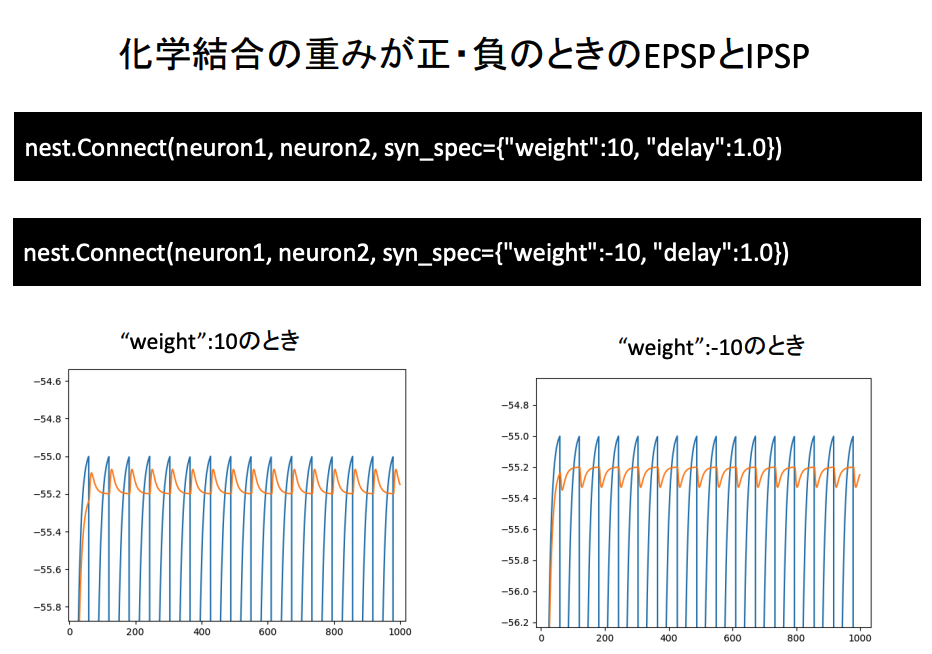

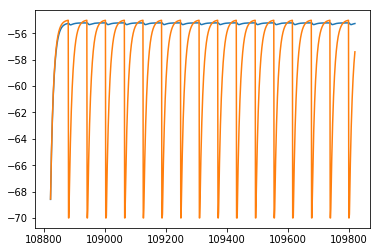

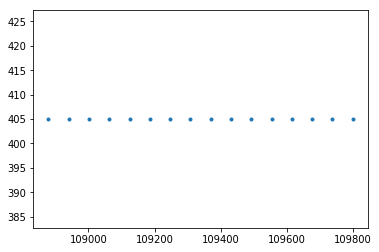

In [147]:
import pylab
import nest

neuron1 = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")

nest.SetStatus(neuron1, {"I_e": 370.0})  # 結合の影響は発火しなくても確認できる
# nest.SetStatus(neuron1, {"I_e": 375.0})  # neuron1は単体ではギリギリ発火しない信号だか、結合によって発火する。
nest.SetStatus(neuron2, {"I_e": 376.0})

# 神経細胞同士もConnectで結合, 後続の神経細胞が発火するかどうかは, syn_spec{"weight"}にも依存する。
# nest.Connect(neuron2, neuron1, syn_spec={"weight":10., "delay":1.0}) # 興奮性 EPSP
nest.Connect(neuron2, neuron1, syn_spec={"weight":-10., "delay":1.0}) # 抑制性 IPSP

multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter, neuron1)
nest.Connect(multimeter, neuron2)

nest.Connect(neuron1, spikedetector)
nest.Connect(neuron2, spikedetector)

nest.Simulate(1000.0)

pylab.figure(1)
dm = nest.GetStatus(multimeter)[0]
Vms1 = dm["events"]["V_m"][::2]
ts1 = dm["events"]["times"][::2]
pylab.plot(ts1, Vms1)

Vms2 = dm["events"]["V_m"][1::2]
ts2 = dm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)

pylab.figure(2)
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.plot(ts, evs, ".")
pylab.show()

# nest examples gap_junction(双方向性)
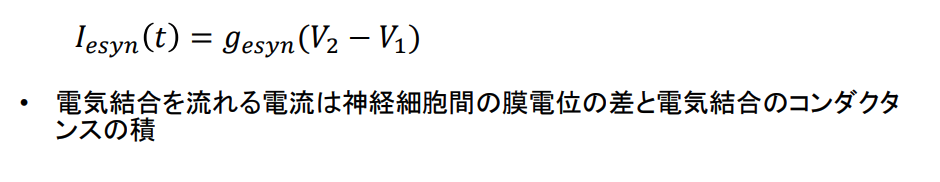

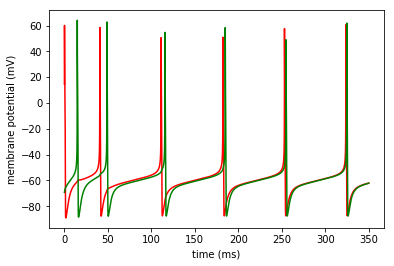

In [148]:
# -*- coding: utf-8 -*-
#
# gap_junctions_two_neurons.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

"""Gap Junctions: Two neuron example
--------------------------------------

This script simulates two Hodgkin-Huxley neurons of type ``hh_psc_alpha_gap``
connected by a gap junction. Both neurons receive a constant current of
100.0 pA. The neurons are initialized with different membrane potentials and
synchronize over time due to the gap-junction connection.

"""

import nest
import pylab as pl
import numpy

nest.ResetKernel()

###############################################################################
# First we set the resolution of the simulation, create two neurons and
# create a ``voltmeter`` for recording.

nest.SetKernelStatus({'resolution': 0.05})

neuron = nest.Create('hh_psc_alpha_gap', 2)

vm = nest.Create('voltmeter', params={'to_file': False,
                                      'withgid': True,
                                      'withtime': True,
                                      'interval': 0.1})

###############################################################################
# Then we set the constant current input, modify the inital membrane
# potential of one of the neurons and connect the neurons to the ``voltmeter``.

nest.SetStatus(neuron, {'I_e': 100.})
nest.SetStatus([neuron[0]], {'V_m': -10.})

nest.Connect(vm, neuron, 'all_to_all')

###############################################################################
# In order to create the ``gap_junction`` connection we employ the
# ``all_to_all`` connection rule: Gap junctions are bidirectional connections,
# therefore we need to connect `neuron[0]` to `neuron[1]` and `neuron[1]` to
# `neuron[0]`:

nest.Connect(neuron, neuron,
             {'rule': 'all_to_all', 'autapses': False},
             {'model': 'gap_junction', 'weight': 0.5})

###############################################################################
# Finally we start the simulation and plot the membrane potentials of both
# neurons.

nest.Simulate(351.)

senders = nest.GetStatus(vm, 'events')[0]['senders']
times = nest.GetStatus(vm, 'events')[0]['times']
V = nest.GetStatus(vm, 'events')[0]['V_m']

pl.figure(1)
pl.plot(times[numpy.where(senders == 1)],
        V[numpy.where(senders == 1)], 'r-')
pl.plot(times[numpy.where(senders == 2)],
        V[numpy.where(senders == 2)], 'g-')
pl.xlabel('time (ms)')
pl.ylabel('membrane potential (mV)')
pl.show()


# 電気結合でつながる多数の神経細胞
同期活動が出現する。これはかなり綺麗な例。

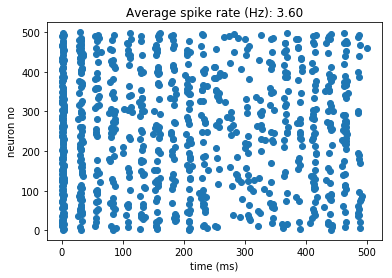

In [149]:
# -*- coding: utf-8 -*-
#
# gap_junctions_inhibitory_network.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

"""Gap Junctions: Inhibitory network example
-----------------------------------------------

This script simulates an inhibitory network of 500 Hodgkin-Huxley neurons.
Without the gap junctions (meaning for ``gap_weight = 0.0``) the network shows
an asynchronous irregular state that is caused by the external excitatory
Poissonian drive being balanced by the inhibitory feedback within the
network. With increasing `gap_weight` the network synchronizes:

For a lower gap weight of 0.3 nS the network remains in an asynchronous
state. With a weight of 0.54 nS the network switches randomly between the
asynchronous to the synchronous state, while for a gap weight of 0.7 nS a
stable synchronous state is reached.

This example is also used as test case 2 (see Figure 9 and 10)
in [1]_.

References
~~~~~~~~~~~

.. [1] Hahne et al. (2015) A unified framework for spiking and gap-junction
       interactions in distributed neuronal network simulations, Front.
       Neuroinform. http://dx.doi.org/10.3389/neuro.11.012.2008
"""

import nest
import pylab as pl
import numpy
import random

n_neuron = 500
gap_per_neuron = 60
inh_per_neuron = 50
delay = 1.0
j_exc = 300.
j_inh = -50.
threads = 8
stepsize = 0.05
simtime = 501.
gap_weight = 0.3

nest.ResetKernel()

###############################################################################
# First we set the random seed, adjust the kernel settings and create
# ``hh_psc_alpha_gap`` neurons, ``spike_detector`` and ``poisson_generator``.

random.seed(1)

nest.SetKernelStatus({'resolution': 0.05,
                      'total_num_virtual_procs': threads,
                      'print_time': True,
                      # Settings for waveform relaxation
                      # 'use_wfr': False uses communication in every step
                      # instead of an iterative solution
                      'use_wfr': True,
                      'wfr_comm_interval': 1.0,
                      'wfr_tol': 0.0001,
                      'wfr_max_iterations': 15,
                      'wfr_interpolation_order': 3})

neurons = nest.Create('hh_psc_alpha_gap', n_neuron)

sd = nest.Create("spike_detector", params={'to_file': False,
                                           'to_memory': True})
pg = nest.Create("poisson_generator", params={'rate': 500.0})

###############################################################################
# Each neuron shall receive ``inh_per_neuron = 50`` inhibitory synaptic inputs
# that are randomly selected from all other neurons, each with synaptic
# weight ``j_inh = -50.0`` pA and a synaptic delay of 1.0 ms. Furthermore each
# neuron shall receive an excitatory external Poissonian input of 500.0 Hz
# with synaptic weight ``j_exc = 300.0`` pA and the same delay.
# The desired connections are created with the following commands:

conn_dict = {'rule': 'fixed_indegree',
             'indegree': inh_per_neuron,
             'autapses': False,
             'multapses': True}

syn_dict = {'model': 'static_synapse',
            'weight': j_inh,
            'delay': delay}

nest.Connect(neurons, neurons, conn_dict, syn_dict)

nest.Connect(pg, neurons, 'all_to_all', syn_spec={'model': 'static_synapse',
                                                  'weight': j_exc,
                                                  'delay': delay})

###############################################################################
# Then the neurons are connected to the ``spike_detector`` and the initial
# membrane potential of each neuron is set randomly between -40 and -80 mV.

nest.Connect(neurons, sd)

for i in range(n_neuron):
    nest.SetStatus([neurons[i]], {'V_m': (-40. - 40. * random.random())})

#######################################################################################
# Finally gap junctions are added to the network. :math:`(60*500)/2` ``gap_junction``
# connections are added randomly resulting in an average of 60 gap-junction
# connections per neuron. We must not use the ``fixed_indegree`` oder
# ``fixed_outdegree`` functionality of ``nest.Connect()`` to create the
# connections, as ``gap_junction`` connections are bidirectional connections
# and we need to make sure that the same neurons are connected in both ways.
# This is achieved by creating the connections on the Python level with the
# `random` module of the Python Standard Library and connecting the neurons
# using the ``make_symmetric`` flag for ``one_to_one`` connections.

n_connection = int(n_neuron * gap_per_neuron / 2)
connections = numpy.transpose(
    [random.sample(neurons, 2) for _ in range(n_connection)])

nest.Connect(connections[0], connections[1],
             {'rule': 'one_to_one', 'make_symmetric': True},
             {'model': 'gap_junction', 'weight': gap_weight})

###############################################################################
# In the end we start the simulation and plot the spike pattern.

nest.Simulate(simtime)

times = nest.GetStatus(sd, 'events')[0]['times']
spikes = nest.GetStatus(sd, 'events')[0]['senders']
n_spikes = nest.GetStatus(sd, 'n_events')[0]

hz_rate = (1000.0 * n_spikes / simtime) / n_neuron

pl.figure(1)
pl.plot(times, spikes, 'o')
pl.title('Average spike rate (Hz): %.2f' % hz_rate)
pl.xlabel('time (ms)')
pl.ylabel('neuron no')
pl.show()

Building network
Connecting devices
Connecting network
Excitatory connections
Inhibitory connections
Simulating
Brunel network simulation (Python)
Number of neurons : 12500
Number of synapses: 15637600
       Exitatory  : 12512500
       Inhibitory : 3125000
Excitatory rate   : 61.24 Hz
Inhibitory rate   : 61.22 Hz
Building time     : 2.36 s
Simulation time   : 38.97 s


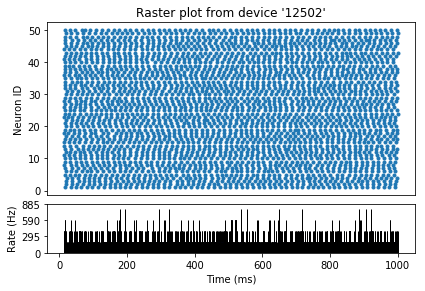

In [160]:
# -*- coding: utf-8 -*-
#
# brunel_alpha_nest.py
#
# This file is part of NEST.
#
# Copyright (C) 2004 The NEST Initiative
#
# NEST is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 2 of the License, or
# (at your option) any later version.
#
# NEST is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with NEST.  If not, see <http://www.gnu.org/licenses/>.

"""Random balanced network (alpha synapses) connected with NEST
------------------------------------------------------------------

This script simulates an excitatory and an inhibitory population on
the basis of the network used in [1]_.

In contrast to ``brunel-alpha-numpy.py``, this variant uses NEST's builtin
connection routines to draw the random connections instead of NumPy.

When connecting the network customary synapse models are used, which
allow for querying the number of created synapses. Using spike
detectors the average firing rates of the neurons in the populations
are established. The building as well as the simulation time of the
network are recorded.

References
~~~~~~~~~~~~~

.. [1] Brunel N (2000). Dynamics of sparsely connected networks of excitatory and
       inhibitory spiking neurons. Journal of Computational Neuroscience 8,
       183-208.

See Also
~~~~~~~~~~~~

:doc:`brunel_alpha_numpy`

"""

###############################################################################
# Import all necessary modules for simulation, analysis and plotting. Scipy
# should be imported before nest.

from scipy.optimize import fsolve

import nest
import nest.raster_plot

import time
from numpy import exp

###############################################################################
# Definition of functions used in this example. First, define the `Lambert W`
# function implemented in SLI. The second function computes the maximum of
# the postsynaptic potential for a synaptic input current of unit amplitude
# (1 pA) using the `Lambert W` function. Thus function will later be used to
# calibrate the synaptic weights.


def LambertWm1(x):
    nest.ll_api.sli_push(x)
    nest.ll_api.sli_run('LambertWm1')
    y = nest.ll_api.sli_pop()
    return y


def ComputePSPnorm(tauMem, CMem, tauSyn):
    a = (tauMem / tauSyn)
    b = (1.0 / tauSyn - 1.0 / tauMem)

    # time of maximum
    t_max = 1.0 / b * (-LambertWm1(-exp(-1.0 / a) / a) - 1.0 / a)

    # maximum of PSP for current of unit amplitude
    return (exp(1.0) / (tauSyn * CMem * b) *
            ((exp(-t_max / tauMem) - exp(-t_max / tauSyn)) / b -
             t_max * exp(-t_max / tauSyn)))

nest.ResetKernel()
nest.SetKernelStatus({"local_num_threads": 1})

###############################################################################
# Assigning the current time to a variable in order to determine the build
# time of the network.

startbuild = time.time()


###############################################################################
# Assigning the simulation parameters to variables.

dt = 0.1    # the resolution in ms
simtime = 1000.0  # Simulation time in ms
delay = 1.5    # synaptic delay in ms

###############################################################################
# Definition of the parameters crucial for asynchronous irregular firing of
# the neurons.

g = 4.0  # ratio inhibitory weight/excitatory weight
eta = 2.0  # external rate relative to threshold rate
epsilon = 0.1  # connection probability

###############################################################################
# Definition of the number of neurons in the network and the number of neuron
# recorded from

order = 2500
NE = 4 * order  # number of excitatory neurons
NI = 1 * order  # number of inhibitory neurons
N_neurons = NE + NI   # number of neurons in total
N_rec = 50      # record from 50 neurons

###############################################################################
# Definition of connectivity parameter

CE = int(epsilon * NE)  # number of excitatory synapses per neuron
CI = int(epsilon * NI)  # number of inhibitory synapses per neuron
C_tot = int(CI + CE)      # total number of synapses per neuron

###############################################################################
# Initialization of the parameters of the integrate and fire neuron and the
# synapses. The parameter of the neuron are stored in a dictionary. The
# synaptic currents are normalized such that the amplitude of the PSP is J.

tauSyn = 0.5  # synaptic time constant in ms
tauMem = 20.0  # time constant of membrane potential in ms
CMem = 250.0  # capacitance of membrane in in pF
theta = 20.0  # membrane threshold potential in mV
neuron_params = {"C_m": CMem,
                 "tau_m": tauMem,
                 "tau_syn_ex": tauSyn,
                 "tau_syn_in": tauSyn,
                 "t_ref": 2.0,
                 "E_L": 0.0,
                 "V_reset": 0.0,
                 "V_m": 0.0,
                 "V_th": theta}
J = 0.1        # postsynaptic amplitude in mV
J_unit = ComputePSPnorm(tauMem, CMem, tauSyn)
J_ex = J / J_unit  # amplitude of excitatory postsynaptic current
J_in = -g * J_ex    # amplitude of inhibitory postsynaptic current

###############################################################################
# Definition of threshold rate, which is the external rate needed to fix the
# membrane potential around its threshold, the external firing rate and the
# rate of the poisson generator which is multiplied by the in-degree CE and
# converted to Hz by multiplication by 1000.

nu_th = (theta * CMem) / (J_ex * CE * exp(1) * tauMem * tauSyn)
nu_ex = eta * nu_th
p_rate = 1000.0 * nu_ex * CE

################################################################################
# Configuration of the simulation kernel by the previously defined time
# resolution used in the simulation. Setting ``print_time`` to `True` prints the
# already processed simulation time as well as its percentage of the total
# simulation time.

nest.SetKernelStatus({"resolution": dt, "print_time": True,
                      "overwrite_files": True})

print("Building network")

###############################################################################
# Configuration of the model ``iaf_psc_alpha`` and ``poisson_generator`` using
# ``SetDefaults``. This function expects the model to be the inserted as a
# string and the parameter to be specified in a dictionary. All instances of
# theses models created after this point will have the properties specified
# in the dictionary by default.

nest.SetDefaults("iaf_psc_alpha", neuron_params)
nest.SetDefaults("poisson_generator", {"rate": p_rate})

###############################################################################
# Creation of the nodes using ``Create``. We store the returned handles in
# variables for later reference. Here the excitatory and inhibitory, as well
# as the poisson generator and two spike detectors. The spike detectors will
# later be used to record excitatory and inhibitory spikes.

nodes_ex = nest.Create("iaf_psc_alpha", NE)
nodes_in = nest.Create("iaf_psc_alpha", NI)
noise = nest.Create("poisson_generator")
espikes = nest.Create("spike_detector")
ispikes = nest.Create("spike_detector")

###############################################################################
# Configuration of the spike detectors recording excitatory and inhibitory
# spikes using ``SetStatus``, which expects a list of node handles and a list
# of parameter dictionaries. Setting the variable ``to_file`` to `True` ensures
# that the spikes will be recorded in a .gdf file starting with the string
# assigned to label. Setting ``withtime`` and ``withgid`` to `True` ensures that
# each spike is saved to file by stating the gid of the spiking neuron and
# the spike time in one line.

nest.SetStatus(espikes, [{"label": "brunel-py-ex",
                          "withtime": True,
                          "withgid": True,
                          "to_file": True}])

nest.SetStatus(ispikes, [{"label": "brunel-py-in",
                          "withtime": True,
                          "withgid": True,
                          "to_file": True}])

print("Connecting devices")

###############################################################################
# Definition of a synapse using ``CopyModel``, which expects the model name of
# a pre-defined synapse, the name of the customary synapse and an optional
# parameter dictionary. The parameters defined in the dictionary will be the
# default parameter for the customary synapse. Here we define one synapse for
# the excitatory and one for the inhibitory connections giving the
# previously defined weights and equal delays.

nest.CopyModel("static_synapse", "excitatory",
               {"weight": J_ex, "delay": delay})
nest.CopyModel("static_synapse", "inhibitory",
               {"weight": J_in, "delay": delay})

#################################################################################
# Connecting the previously defined poisson generator to the excitatory and
# inhibitory neurons using the excitatory synapse. Since the poisson
# generator is connected to all neurons in the population the default rule
# (``all_to_all``) of ``Connect`` is used. The synaptic properties are inserted
# via ``syn_spec`` which expects a dictionary when defining multiple variables or
# a string when simply using a pre-defined synapse.

nest.Connect(noise, nodes_ex, syn_spec="excitatory")
nest.Connect(noise, nodes_in, syn_spec="excitatory")

###############################################################################
# Connecting the first ``N_rec`` nodes of the excitatory and inhibitory
# population to the associated spike detectors using excitatory synapses.
# Here the same shortcut for the specification of the synapse as defined
# above is used.

nest.Connect(nodes_ex[:N_rec], espikes, syn_spec="excitatory")
nest.Connect(nodes_in[:N_rec], ispikes, syn_spec="excitatory")

print("Connecting network")

print("Excitatory connections")

###############################################################################
# Connecting the excitatory population to all neurons using the pre-defined
# excitatory synapse. Beforehand, the connection parameter are defined in a
# dictionary. Here we use the connection rule ``fixed_indegree``,
# which requires the definition of the indegree. Since the synapse
# specification is reduced to assigning the pre-defined excitatory synapse it
# suffices to insert a string.

conn_params_ex = {'rule': 'fixed_indegree', 'indegree': CE}
nest.Connect(nodes_ex, nodes_ex + nodes_in, conn_params_ex, "excitatory")

print("Inhibitory connections")

###############################################################################
# Connecting the inhibitory population to all neurons using the pre-defined
# inhibitory synapse. The connection parameter as well as the synapse
# parameter are defined analogously to the connection from the excitatory
# population defined above.

conn_params_in = {'rule': 'fixed_indegree', 'indegree': CI}
nest.Connect(nodes_in, nodes_ex + nodes_in, conn_params_in, "inhibitory")

###############################################################################
# Storage of the time point after the buildup of the network in a variable.

endbuild = time.time()

###############################################################################
# Simulation of the network.

print("Simulating")

nest.Simulate(simtime)

###############################################################################
# Storage of the time point after the simulation of the network in a variable.

endsimulate = time.time()

###############################################################################
# Reading out the total number of spikes received from the spike detector
# connected to the excitatory population and the inhibitory population.

events_ex = nest.GetStatus(espikes, "n_events")[0]
events_in = nest.GetStatus(ispikes, "n_events")[0]

###############################################################################
# Calculation of the average firing rate of the excitatory and the inhibitory
# neurons by dividing the total number of recorded spikes by the number of
# neurons recorded from and the simulation time. The multiplication by 1000.0
# converts the unit 1/ms to 1/s=Hz.

rate_ex = events_ex / simtime * 1000.0 / N_rec
rate_in = events_in / simtime * 1000.0 / N_rec

###############################################################################
# Reading out the number of connections established using the excitatory and
# inhibitory synapse model. The numbers are summed up resulting in the total
# number of synapses.

num_synapses = (nest.GetDefaults("excitatory")["num_connections"] +
                nest.GetDefaults("inhibitory")["num_connections"])

###############################################################################
# Establishing the time it took to build and simulate the network by taking
# the difference of the pre-defined time variables.

build_time = endbuild - startbuild
sim_time = endsimulate - endbuild

###############################################################################
# Printing the network properties, firing rates and building times.

print("Brunel network simulation (Python)")
print("Number of neurons : {0}".format(N_neurons))
print("Number of synapses: {0}".format(num_synapses))
print("       Exitatory  : {0}".format(int(CE * N_neurons) + N_neurons))
print("       Inhibitory : {0}".format(int(CI * N_neurons)))
print("Excitatory rate   : %.2f Hz" % rate_ex)
print("Inhibitory rate   : %.2f Hz" % rate_in)
print("Building time     : %.2f s" % build_time)
print("Simulation time   : %.2f s" % sim_time)

###############################################################################
# Plot a raster of the excitatory neurons and a histogram.

# nest.raster_plot.from_device(espikes, hist=True)

import pylab
nest.raster_plot.from_device(espikes, hist=True, hist_binwidth=0.1)
pylab.show()

# OpemMPIで並列スレッドで計算
スレッド数は`nest.SetKernelStatus({"local_num_threads": 12})`にて指定している。

この結果は、6コア CPUが1つの計算機（マルチスレッドでスレッド数は12）

```
sysadmin@home001:~$ nproc
12
sysadmin@home001:~$ fgrep 'physical id' /proc/cpuinfo | sort -u | wc -l
1
sysadmin@home001:~$ fgrep 'cpu cores' /proc/cpuinfo | sort -u | sed 's/.*: //'
6
sysadmin@home001:~$ fgrep 'processor' /proc/cpuinfo | wc -l
12
```

In [175]:
!mpirun -np 1 python brunel_alpha_nest.py

--------------------------------------------------------------------------
[[32045,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: cc63ff2b8d54

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------
[INFO] [2021.8.27 4:45:56 /nest-simulator-2.20.0/nestkernel/rng_manager.cpp:217 @ Network::create_rngs_] : Creating default RNGs
[INFO] [2021.8.27 4:45:56 /nest-simulator-2.20.0/nestkernel/rng_manager.cpp:260 @ Network::create_grng_] : Creating new default global RNG

              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-2.20.0
 Built: Jul 26 2021 05:23:20

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for detai

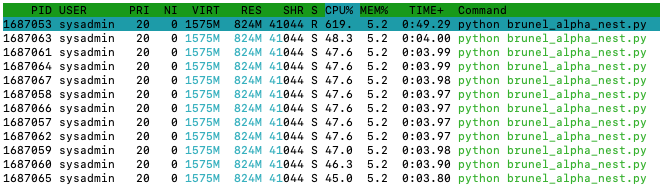

スレッド数と計算時間
1: 23.28
2: 11.54
3: 7.60
6: 6.27
10: 4.17, 
11: 4.24, 4.25, 4.23, 4.54
12: 39.80, 35.20, 27.42